# Problem Statement🧠
The objective of this project is to analyze the pricing patterns of laptops listed on Flipkart and understand the relationship between various laptop specifications and their prices. By scraping laptop data from Flipkart using Python, BeautifulSoup, and Regular Expressions, this project aims to extract useful insights through data cleaning, exploratory data analysis, and visualization.

## TARGET FEATURE 🎯
The key target feature in this analysis is Price, and the goal is to identify how other specifications such as Processor type, RAM size, Storage capacity, Operating System, Display size, and User Ratings influence the pricing of laptops.

# Data Collection 📥

In [1]:
url= r"https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

##### Url from  the flipkart 

In [10]:
import requests

###### We Should import request library it uses to send HTTP requests it lets the python code to interact with websites

In [4]:
request_header = {'Content-Type': 'text/html; charset=utf-8','User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36'}

###### We use requests headers to provide extra information to the server to control how the request is processed.

In [5]:
page  = requests.get(url,headers = request_header)

In [6]:
page

<Response [200]>

###### The response is 200 which means it is successfull, we can proceed the webscraping

In [7]:
page.text

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e4e719.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property=

In [8]:
from bs4 import BeautifulSoup

##### BeautifulSoup is a library which will understand the html code.

In [11]:
soup = BeautifulSoup(page.text)

In [12]:
soup.find("div",class_="KzDlHZ").text

'Acer Aspire 3 Intel Celeron Dual Core - (8 GB/128 GB SSD/Windows 11 Home) A311-45 Thin and Light Lapto...'

In [13]:
for i in soup.find_all("div",class_="KzDlHZ"):
    print(i.text)

Acer Aspire 3 Intel Celeron Dual Core - (8 GB/128 GB SSD/Windows 11 Home) A311-45 Thin and Light Lapto...
HP 15R (2025) Intel Core i3 13th Gen 1315U - (8 GB/512 GB SSD/Windows 11 Pro) 15R G9 Thin and Light La...
ASUS Vivobook 15, with Backlit Keyboard, Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Ho...
SAMSUNG Galaxy Book4 Metal Intel Core i5 13th Gen 1335U - (16 GB/512 GB SSD/Windows 11 Home) NP750XGJ-...
ASUS Vivobook 15 Intel Core i3 12th Gen 1215U - (16 GB/512 GB SSD/Windows 11 Home) X1504ZA-NJ342WS Thi...
DELL Wyse 5470 Intel Celeron Quad Core Processor Base Frequency 1.10 GHz, Burst Frequency 2.40 GHz - (...
ASUS Chromebook Intel Celeron Dual Core N4500 - (8 GB/128 GB EMMC Storage/Chrome OS) CX1500CKA-NJ0395 ...
Acer Aspire 3 Intel Celeron Dual Core - (8 GB/512 GB SSD/Windows 11 Home) A311-45 Thin and Light Lapto...
DELL Latitude 3540 (2024) Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Pro) Latitude 354...
Acer Aspire Lite Intel Core i5 12th Gen 12450H

In [2]:
import re
import numpy as np
import pandas as pd

In [16]:
for i in range(1,5):
    print(f"Url - {i}")

Url - 1
Url - 2
Url - 3
Url - 4


In [17]:
for i in range(1,100):
    url= f"https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    print(url)

https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=8
https://www.flipkart.com/search?q=laptop

In [55]:

Brand_Name = []
Model_Name = []
Processor_Type = []
Processor_Name = []
Processor_Number = []
Price = []
Storage = []
Ram = []
Rating = []
No_Rating = []
No_Reviews = []
Screen_Size = []
Operating_System = []
OS_Versions = []

request_header = {
    "User-Agent": "Mozilla/5.0"
}

for page_num in range(1, 101):  # 100 pages
    url = f"https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={page_num}"
    page = requests.get(url, headers=request_header)
    soup = BeautifulSoup(page.text, 'html.parser')

    for item in soup.find_all("div", class_="tUxRFH"):
        text = item.text

        # Brand Name
        title = item.find("div", class_="KzDlHZ")
        if title:
            brand_match = re.findall(r'^\w+', title.text)
            Brand_Name.append(brand_match[0] if brand_match else np.nan)
        else:
            Brand_Name.append(np.nan)

        # Model Name
        match = re.findall(r'(Galaxy Book\d+|IdeaPad|Aspire|Chromebook|MacBook|Swift|Vivobook|Notebook|G\d{2,})', text, re.IGNORECASE)
        Model_Name.append(match[0] if match else np.nan)

        # Processor Type
        match = re.findall(r'\b(Intel|AMD|Apple|MediaTek)\b', text, re.IGNORECASE)
        Processor_Type.append(match[0].capitalize() if match else np.nan)

        # Processor Name
        match = re.findall(r'\b(i[3579]|Ryzen\s?[3579]|M\d|Kompanio|Helio)\b', text, re.IGNORECASE)
        Processor_Name.append(match[0].title() if match else np.nan)

        # Processor Number
        match = re.findall(r'\b\d{3,5}[A-Z]?\b', text)
        Processor_Number.append(match[0] if match else np.nan)

        # Price
        match = re.findall(r'₹[\d,]+', text)
        Price.append(int(match[0].replace('₹', '').replace(',', '')) if match else np.nan)

        # Storage
        match = re.findall(r'(\d+)\s*(GB|TB)\s*(SSD|HDD|EMMC)', text, re.IGNORECASE)
        if match:
            value, unit, _ = match[0]
            value = int(value)
            if unit.upper() == 'TB':
                value *= 1024
            Storage.append(value)
        else:
            Storage.append(np.nan)

        match = re.findall(r'(\d+)\s*GB(?:\s*RAM)?', text, re.IGNORECASE)
        Ram.append(int(match[0]) if match else np.nan)

        # Rating
        rating = item.find("div", class_="XQDdHH")
        Rating.append(rating.text if rating else np.nan)

        # No. of Ratings and Reviews
        rating_reviews = item.find("span", class_="Wphh3N")
        if rating_reviews:
            no_rating = re.findall(r"(\d[\d,]*)\s+Ratings", rating_reviews.text)
            no_reviews = re.findall(r"&\s*(\d[\d,]*)\s+Reviews", rating_reviews.text)
            No_Rating.append(no_rating[0] if no_rating else np.nan)
            No_Reviews.append(no_reviews[0] if no_reviews else np.nan)
        else:
            No_Rating.append(np.nan)
            No_Reviews.append(np.nan)

        # Screen Size
        match = re.findall(r'(\d{1,2}\.\d)\s*[-]?inch', text, re.IGNORECASE)
        Screen_Size.append(match[0] if match else np.nan)

        # Operating System
        match = re.findall(r'\b(Windows|Mac|DOS|Chrome|Linux|Ubuntu)\b', text, re.IGNORECASE)
        Operating_System.append(match[0] if match else np.nan)

        # OS Version
        match = re.search(r'(Windows|Ubuntu|Mac\sOS\sX|Linux|Chrome\sOS|DOS)[^\d]*(\d+)', text, re.IGNORECASE)
        OS_Versions.append(match.group(2) if match else np.nan)



In [56]:
print("Brand_Name:", len(Brand_Name))
print("Model_Name:", len(Model_Name))
print("Processor_Type:", len(Processor_Type))
print("Processor_Name:", len(Processor_Name))
print("Processor_Number:", len(Processor_Number))
print("Price:", len(Price))
print("Storage:", len(Storage))
print("Ram:", len(Ram))
print("Rating:", len(Rating))
print("No_Rating:", len(No_Rating))
print("Screen_Size:", len(Screen_Size))
print("Operating_System:", len(Operating_System))
print("OS_Versions:", len(OS_Versions))

Brand_Name: 912
Model_Name: 912
Processor_Type: 912
Processor_Name: 912
Processor_Number: 912
Price: 912
Storage: 912
Ram: 912
Rating: 912
No_Rating: 912
Screen_Size: 912
Operating_System: 912
OS_Versions: 912


In [57]:
data = {
    "Brand_Name": Brand_Name,
    "Model_Name": Model_Name,
    "Processor_Type":Processor_Type,
    "Processor_Name":Processor_Name,
    "Processor_Number":Processor_Number,
    "Price": Price,
    "Storage": Storage,
    "Ram": Ram,
    "Rating": Rating,
    "No_Rating": No_Rating,
    "Screen_Size": Screen_Size,
    "Operating_System": Operating_System,
    "OS_Versions": OS_Versions
}


In [ ]:
df = pd.DataFrame(data)

print("DataFrame shape:", df.shape)

In [59]:
df

,Brand_Name,Model_Name,Processor_Type,Processor_Name,Processor_Number,Price,Storage,Ram,Rating,No_Rating,Screen_Size,Operating_System,OS_Versions
0,Lenovo,Chromebook,Mediatek,Kompanio,520,16990,128,8,3.8,"1,604",NaN,Chrome,14
1,Acer,Swift,NaN,NaN,512,56990,512,16,4.4,154,14.5,Windows,11
2,Acer,Aspire,Intel,NaN,128,15990,128,8,3.8,656,11.6,Windows,11
3,HP,NaN,Intel,I3,2025,32990,512,8,4.3,32,15.6,Windows,11
4,ASUS,Vivobook,Intel,I3,1215U,32990,512,8,4.3,"12,941",15.6,Windows,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,ASUS,Vivobook,Amd,Ryzen 3,7320U,29990,512,8,4.3,"1,503",NaN,Windows,11
908,ASUS,Vivobook,NaN,NaN,2025,65990,512,16,4.1,31,NaN,NaN,11
909,HP,NaN,Intel,I5,1235U,48390,512,16,4.2,"6,655",15.6,Windows,11
910,MSI,NaN,Intel,I7,9750H,66490,512,8,4.5,"1,675",15.6,Windows,10


### Now we scrapped the data of laptops with the specifications of Brand Name, Model name, Proccessor type, Processor name,Processor number, Price, Storage, Ram, Rating, No rating, Screen size, Operating System and their Versions 
     We have totally of 912 rows and 13 columns and we have to clean the data 

# Data Cleaning 🧹

In [60]:
df.duplicated().sum()
df[df.duplicated()]

,Brand_Name,Model_Name,Processor_Type,Processor_Name,Processor_Number,Price,Storage,Ram,Rating,No_Rating,Screen_Size,Operating_System,OS_Versions
20,ASUS,Vivobook,NaN,NaN,2025,65990,512,16,4.1,31,NaN,NaN,11
27,Lenovo,Chromebook,Mediatek,Kompanio,520,16990,128,8,3.8,"1,604",NaN,Chrome,14
30,Acer,Swift,NaN,NaN,512,56990,512,16,4.4,154,14.5,Windows,11
31,HP,Chromebook,Intel,NaN,764,22990,64,4,3.9,"1,764",NaN,Chrome,14
36,HP,NaN,Intel,I5,1235U,44990,512,8,4.2,"6,655",15.6,Windows,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,ASUS,Vivobook,NaN,NaN,2025,65990,512,16,4.1,31,NaN,NaN,11
905,HP,NaN,Intel,I5,2024,79990,512,16,NaN,NaN,NaN,Windows,11
906,ASUS,Vivobook,Amd,Ryzen 3,7320U,29990,512,8,4.3,152,NaN,Windows,11
908,ASUS,Vivobook,NaN,NaN,2025,65990,512,16,4.1,31,NaN,NaN,11


### Now we have the duplicate rows, out of 912 rows we have 420 rows of duplicates which is unwanted and we have to remove the Duplicates by using the drop_duplicates parameter by this, it will drop the duplicates keeping the first row as it is 

In [61]:
df.drop_duplicates(keep='first', inplace=True)


Droping the duplicates

In [62]:
df.duplicated().sum()


0

In [64]:
df.shape

(492, 13)

### Now we have dropped the duplicates and now there is 492 rows and 13 columns 

In [67]:
df.isnull().sum()

Brand_Name            0
Model_Name          315
Processor_Type        5
Processor_Name       77
Processor_Number      0
Price                 0
Storage               0
Ram                   0
Rating               67
No_Rating            67
Screen_Size         167
Operating_System     20
OS_Versions           7
dtype: int64

### There are null values for Model name, Processor type, Processor name, Rating, No rating, Screen size, Operating system, Os Verions. We have to handle the null Values 


In [68]:
df["Rating"] = pd.to_numeric(df["Rating"], errors='coerce')

# Fix No_Rating (remove commas, convert to int)
df["No_Rating"] = df["No_Rating"].str.replace(",", "").astype(float)

# Fix Screen_Size (extract float from string like '15.6 inch')
df["Screen_Size"] = df["Screen_Size"].str.extract(r'(\d{1,2}\.\d)').astype(float)


### The Rating, No rating and Screen size gave dtype as object we have to convert them to numeric

In [69]:
df['Storage'].fillna(df['Storage'].median(), inplace=True)
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['No_Rating'].fillna(df['No_Rating'].median(), inplace=True)
df['Screen_Size'].fillna(df['Screen_Size'].median(), inplace=True)
df['Operating_System'].fillna(df['Operating_System'].mode()[0], inplace=True)
df['OS_Versions'].fillna(df['OS_Versions'].mode()[0], inplace=True)

In [70]:
df.isnull().sum()

Brand_Name            0
Model_Name          315
Processor_Type        5
Processor_Name       77
Processor_Number      0
Price                 0
Storage               0
Ram                   0
Rating                0
No_Rating             0
Screen_Size           0
Operating_System      0
OS_Versions           0
dtype: int64

In [71]:
df['Model_Name'].fillna('Unknown', inplace=True)
df['Processor_Type'].fillna(df['Processor_Type'].mode()[0], inplace=True)
df['Processor_Name'].fillna('Unknown', inplace=True)


In [72]:
df.isnull().sum()

Brand_Name          0
Model_Name          0
Processor_Type      0
Processor_Name      0
Processor_Number    0
Price               0
Storage             0
Ram                 0
Rating              0
No_Rating           0
Screen_Size         0
Operating_System    0
OS_Versions         0
dtype: int64

In [73]:
import numpy as np

# Step 1: Replace 'Unknown' with NaN
df.replace('Unknown', np.nan, inplace=True)

# Step 2: Fill NaNs with mode
for col in ['Model_Name', 'Processor_Name', 'Processor_Type']:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [74]:
df

,Brand_Name,Model_Name,Processor_Type,Processor_Name,Processor_Number,Price,Storage,Ram,Rating,No_Rating,Screen_Size,Operating_System,OS_Versions
0,Lenovo,Chromebook,Mediatek,Kompanio,520,16990,128,8,3.8,1604.0,15.6,Chrome,14
1,Acer,Swift,Intel,I5,512,56990,512,16,4.4,154.0,14.5,Windows,11
2,Acer,Aspire,Intel,I5,128,15990,128,8,3.8,656.0,11.6,Windows,11
3,HP,Vivobook,Intel,I3,2025,32990,512,8,4.3,32.0,15.6,Windows,11
4,ASUS,Vivobook,Intel,I3,1215U,32990,512,8,4.3,12941.0,15.6,Windows,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,Lenovo,Chromebook,Intel,I5,8530,17000,64,4,3.8,530.0,15.6,Chrome,14
903,HP,Vivobook,Amd,Ryzen 3,2025,27250,512,8,4.2,159.0,15.6,Windows,11
907,ASUS,Vivobook,Amd,Ryzen 3,7320U,29990,512,8,4.3,1503.0,15.6,Windows,11
910,MSI,Vivobook,Intel,I7,9750H,66490,512,8,4.5,1675.0,15.6,Windows,10


In [75]:
df.isnull().sum()

Brand_Name          0
Model_Name          0
Processor_Type      0
Processor_Name      0
Processor_Number    0
Price               0
Storage             0
Ram                 0
Rating              0
No_Rating           0
Screen_Size         0
Operating_System    0
OS_Versions         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand_Name        491 non-null    object 
 1   Model_Name        491 non-null    object 
 2   Processor_Type    491 non-null    object 
 3   Processor_Name    491 non-null    object 
 4   Processor_Number  491 non-null    object 
 5   Price             491 non-null    int64  
 6   Storage           491 non-null    int64  
 7   Ram               491 non-null    int64  
 8   Rating            491 non-null    float64
 9   No_Rating         491 non-null    float64
 10  Screen_Size       491 non-null    float64
 11  Operating_System  491 non-null    object 
 12  OS_Versions       491 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 50.0+ KB


In [8]:
df.duplicated().sum()


0

In [77]:
df.drop_duplicates(keep='first', inplace=True)


In [78]:
df.duplicated().sum()


0

In [83]:
df.to_csv("laptops3_cleaned.csv")

In [5]:
import pandas as pd

### Now we have cleaned the data, now we have have to export the data in csv format

In [6]:
df = pd.read_csv("laptops3_cleaned.csv")

### After exporting we have to import the data frame and save it 

In [ ]:
df = pd.read_csv("laptops3_cleaned.csv")

In [5]:
df

,Unnamed: 0,Brand_Name,Model_Name,Processor_Type,Processor_Name,Processor_Number,Price,Storage,Ram,Rating,No_Rating,Screen_Size,Operating_System,OS_Versions
0,0,Lenovo,Chromebook,Mediatek,Kompanio,520,16990,128,8,3.8,1604.0,15.6,Chrome,14
1,1,Acer,Swift,Intel,I5,512,56990,512,16,4.4,154.0,14.5,Windows,11
2,2,Acer,Aspire,Intel,I5,128,15990,128,8,3.8,656.0,11.6,Windows,11
3,3,HP,Vivobook,Intel,I3,2025,32990,512,8,4.3,32.0,15.6,Windows,11
4,4,ASUS,Vivobook,Intel,I3,1215U,32990,512,8,4.3,12941.0,15.6,Windows,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,902,Lenovo,Chromebook,Intel,I5,8530,17000,64,4,3.8,530.0,15.6,Chrome,14
487,903,HP,Vivobook,Amd,Ryzen 3,2025,27250,512,8,4.2,159.0,15.6,Windows,11
488,907,ASUS,Vivobook,Amd,Ryzen 3,7320U,29990,512,8,4.3,1503.0,15.6,Windows,11
489,910,MSI,Vivobook,Intel,I7,9750H,66490,512,8,4.5,1675.0,15.6,Windows,10


In [6]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')


In [7]:
df.head()

,Brand_Name,Model_Name,Processor_Type,Processor_Name,Processor_Number,Price,Storage,Ram,Rating,No_Rating,Screen_Size,Operating_System,OS_Versions
0,Lenovo,Chromebook,Mediatek,Kompanio,520,16990,128,8,3.8,1604.0,15.6,Chrome,14
1,Acer,Swift,Intel,I5,512,56990,512,16,4.4,154.0,14.5,Windows,11
2,Acer,Aspire,Intel,I5,128,15990,128,8,3.8,656.0,11.6,Windows,11
3,HP,Vivobook,Intel,I3,2025,32990,512,8,4.3,32.0,15.6,Windows,11
4,ASUS,Vivobook,Intel,I3,1215U,32990,512,8,4.3,12941.0,15.6,Windows,11


In [7]:
df.tail()

,Unnamed: 0,Brand_Name,Model_Name,Processor_Type,Processor_Name,Processor_Number,Price,Storage,Ram,Rating,No_Rating,Screen_Size,Operating_System,OS_Versions
486,902,Lenovo,Chromebook,Intel,I5,8530,17000,64,4,3.8,530.0,15.6,Chrome,14
487,903,HP,Vivobook,Amd,Ryzen 3,2025,27250,512,8,4.2,159.0,15.6,Windows,11
488,907,ASUS,Vivobook,Amd,Ryzen 3,7320U,29990,512,8,4.3,1503.0,15.6,Windows,11
489,910,MSI,Vivobook,Intel,I7,9750H,66490,512,8,4.5,1675.0,15.6,Windows,10
490,911,MSI,Vivobook,Intel,I5,9300H,49999,512,8,4.5,4406.0,15.6,Windows,10


### This is the final data.The cleaned laptop dataset consists of 491 rows and 13 columns after removing duplicate entries and handling missing values. During preprocessing, duplicate rows were dropped to ensure data quality. Columns like Model_Name, Processor_Type, and Processor_Name had missing values, which were handled by replacing them with the placeholder "Unknown" instead of dropping those rows, in order to preserve as much data as possible. Additionally, rows containing "Unknown" values were retained to avoid significant data loss and ensure comprehensive analysis. As a result, the final dataset is free of null values and duplicates, and maintains a consistent structure suitable for further exploration and modeling.



In [8]:
df.describe()

,Price,Storage,Ram,Rating,No_Rating,Screen_Size,OS_Versions
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,57412.156823,565.116090,12.610998,4.160896,859.173116,15.496538,32.665988
std,32672.705704,239.519299,5.191968,0.323530,1957.823775,0.604446,196.858497
min,11990.000000,32.000000,4.000000,1.300000,3.000000,11.600000,1.000000
25%,34840.000000,512.000000,8.000000,4.000000,42.000000,15.600000,11.000000
50%,50488.000000,512.000000,16.000000,4.200000,159.000000,15.600000,11.000000
75%,69990.000000,512.000000,16.000000,4.300000,683.000000,15.600000,11.000000
max,249990.000000,2048.000000,32.000000,5.000000,17944.000000,17.300000,3420.000000


In [16]:
df.to_csv('C:\\Users\\DELL\\Downloads\\csv file\\laptops3_cleaned.csv', index=False)



In [17]:
df.dtypes

Unnamed: 0            int64
Brand_Name           object
Model_Name           object
Processor_Type       object
Processor_Name       object
Processor_Number     object
Price                 int64
Storage               int64
Ram                   int64
Rating              float64
No_Rating           float64
Screen_Size         float64
Operating_System     object
OS_Versions           int64
dtype: object

# Exploratory Data Analysis 📊

## Univarite Analysis

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Categorical Data

### 🟦 1. Bar Plot 

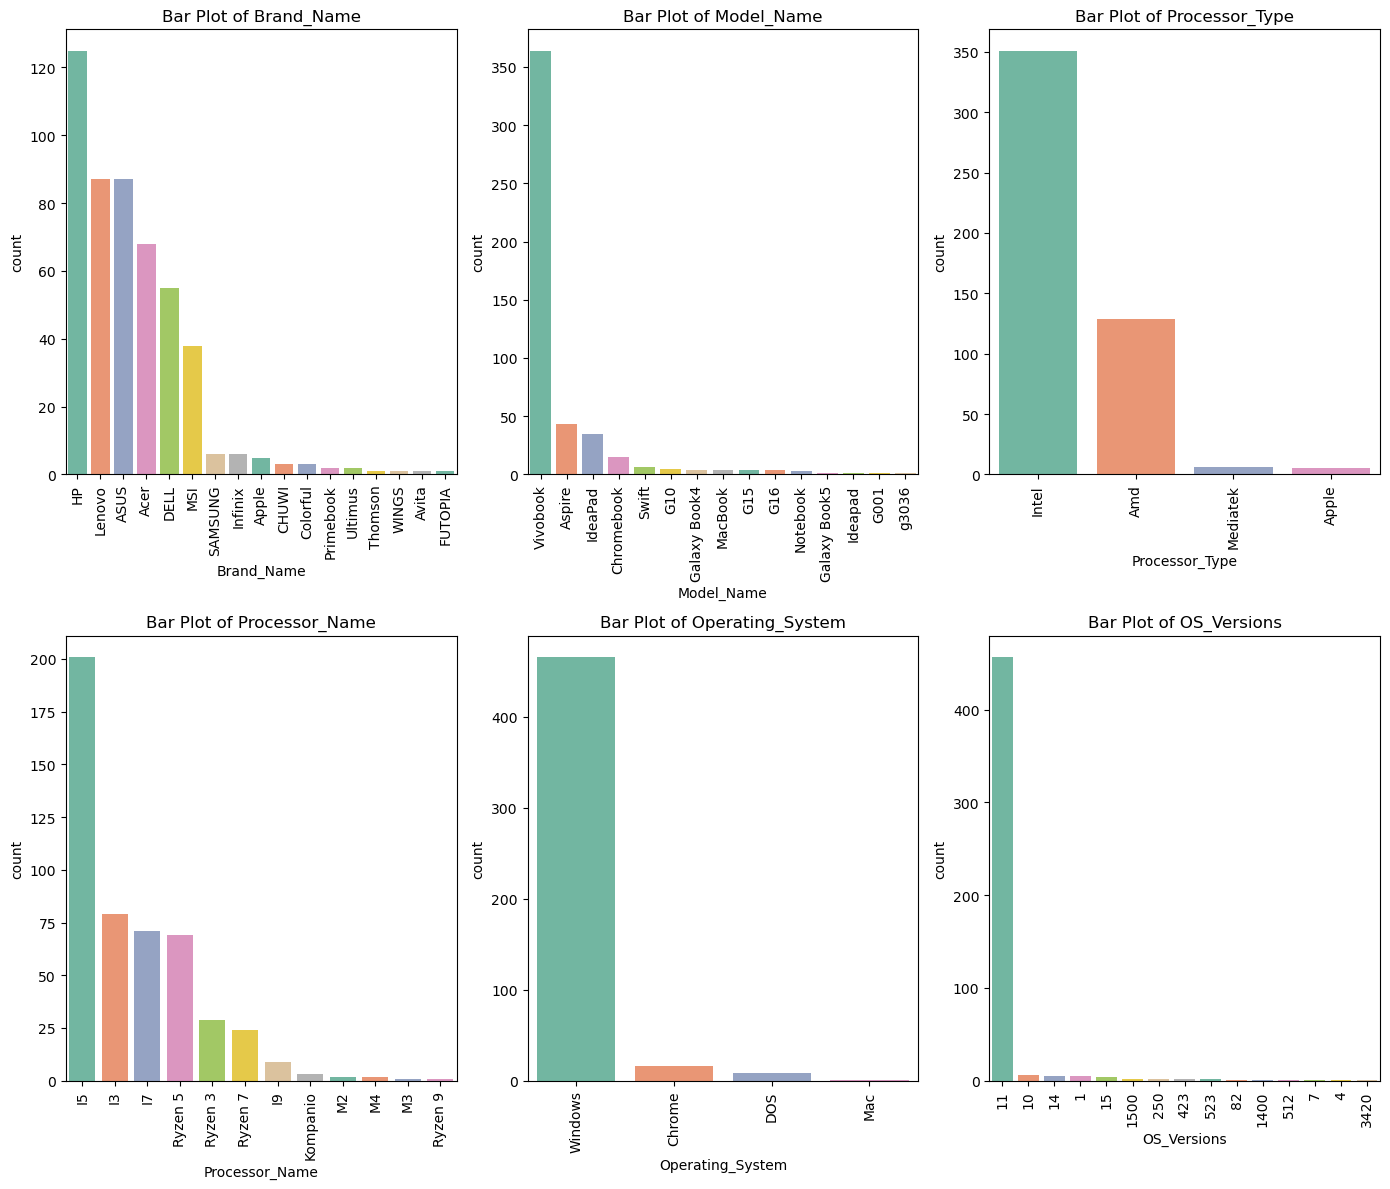

In [97]:
categorical_cols = ['Brand_Name', 'Model_Name', 'Processor_Type', 'Processor_Name', 'Operating_System', 'OS_Versions']

# Set the figure size
plt.figure(figsize=(14, 12))

# Create bar plots for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i) # Create a grid of subplots (2 rows, 3 columns)
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=90)# Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()

### From the above data the bar plots  provide a clear univariate analysis of the categorical features in the laptop dataset. From the visuals, we observe that brands like Lenovo, ASUS, HP, and Acer dominate the market presence in the data. 
### Similarly, model names such as IdeaPad and Vivobook appear more frequently, indicating their popularity.     Intel emerges as the leading processor type, with i3 and i5 being the most common processor names, reflecting the consumer preference for mid-range performance. 
### Windows is the predominant operating system, with Windows 11 being the most frequently listed version. Overall, these plots highlight the market trends, brand dominance, and user preferences in terms of hardware and software configurations.

### 🟧 2. Count Plot 

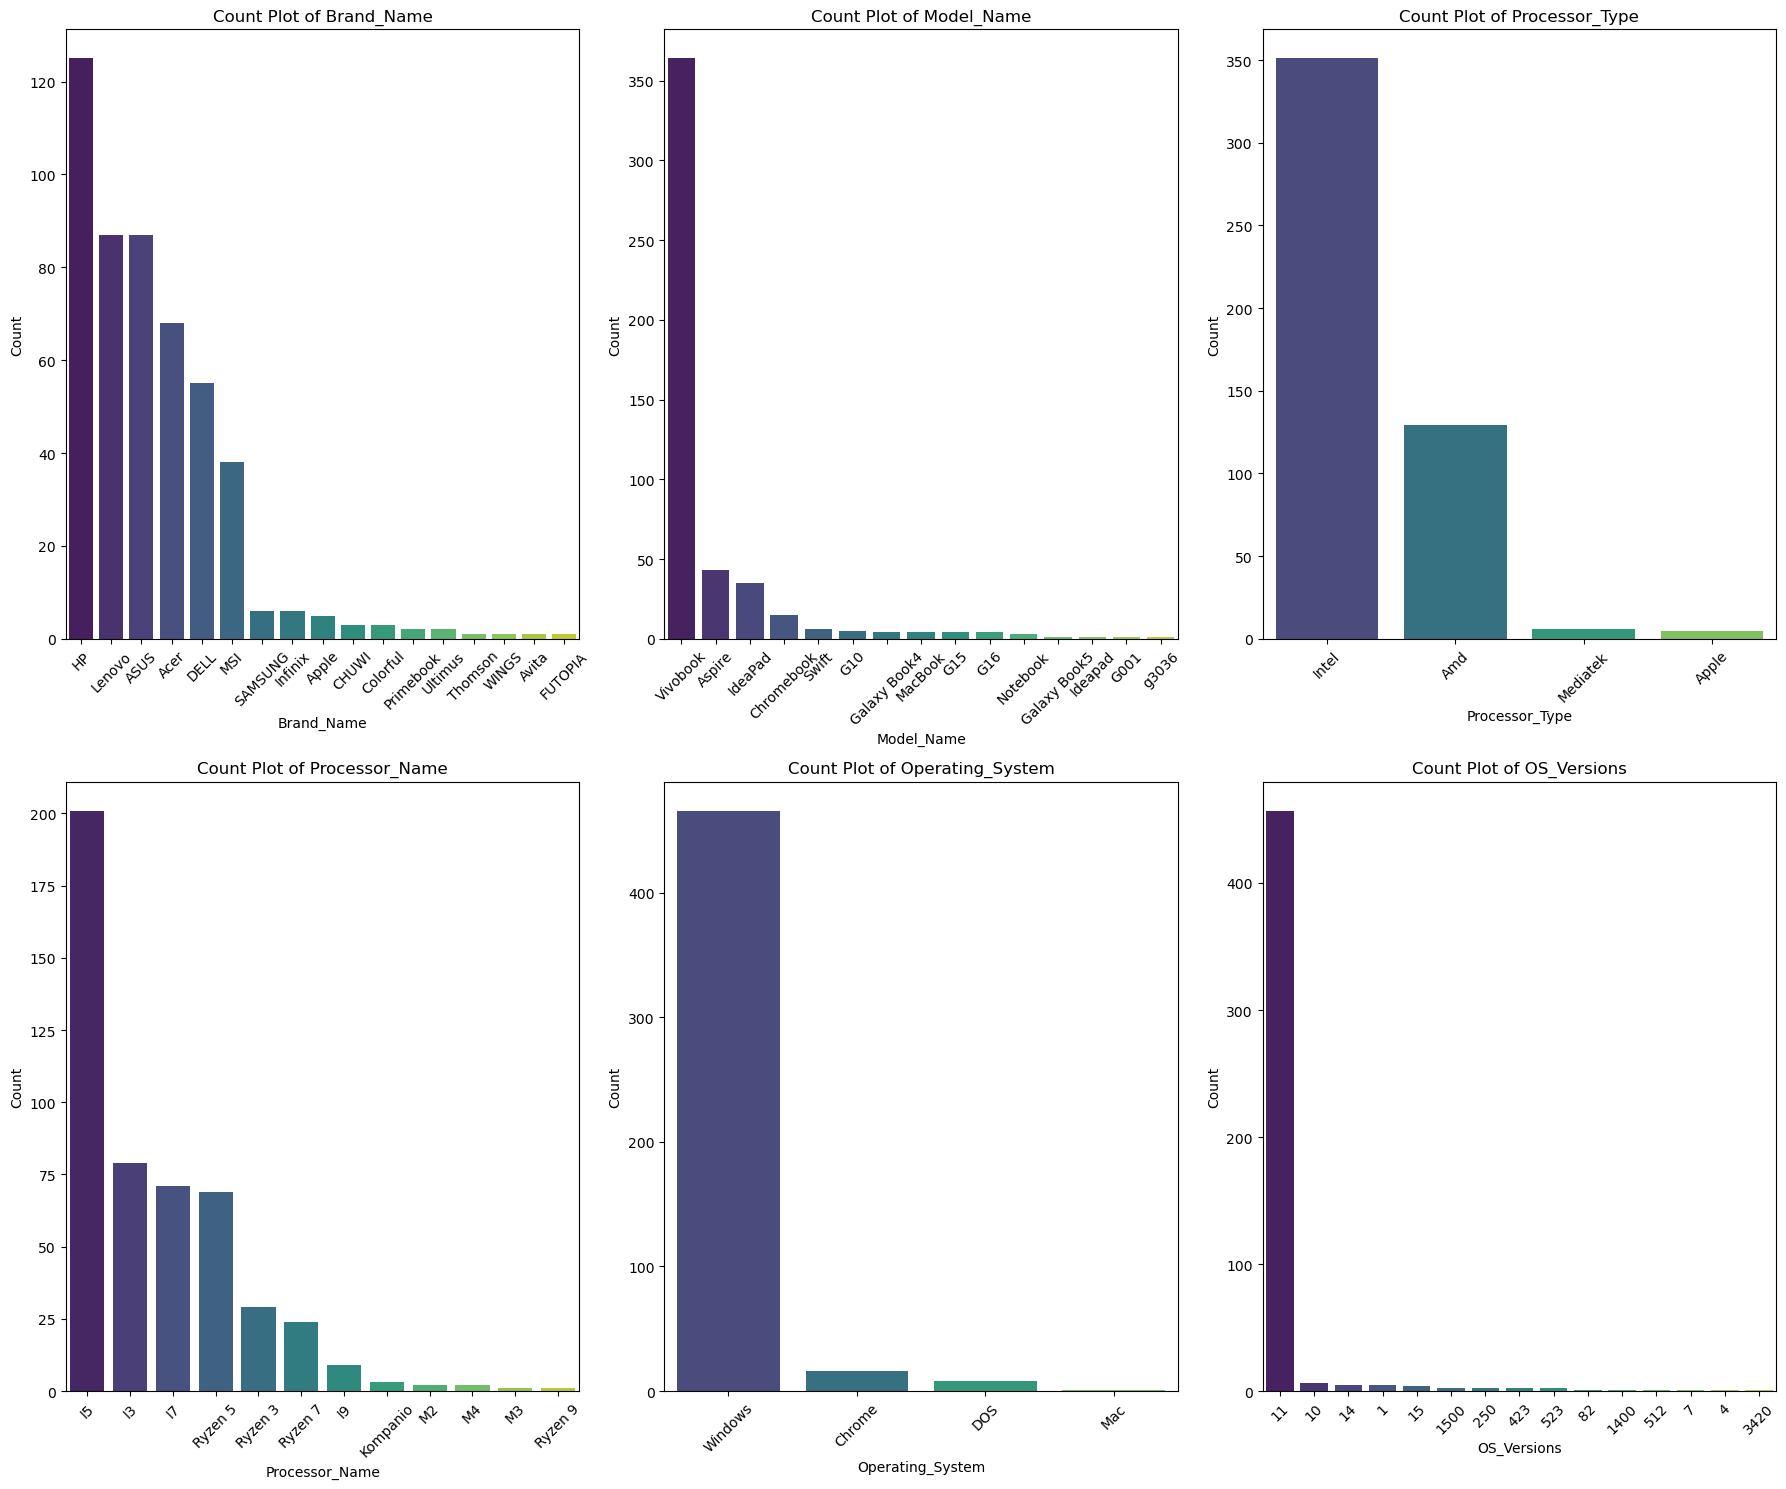

In [23]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Numerical Data

### 🟪1. Histogram Plot

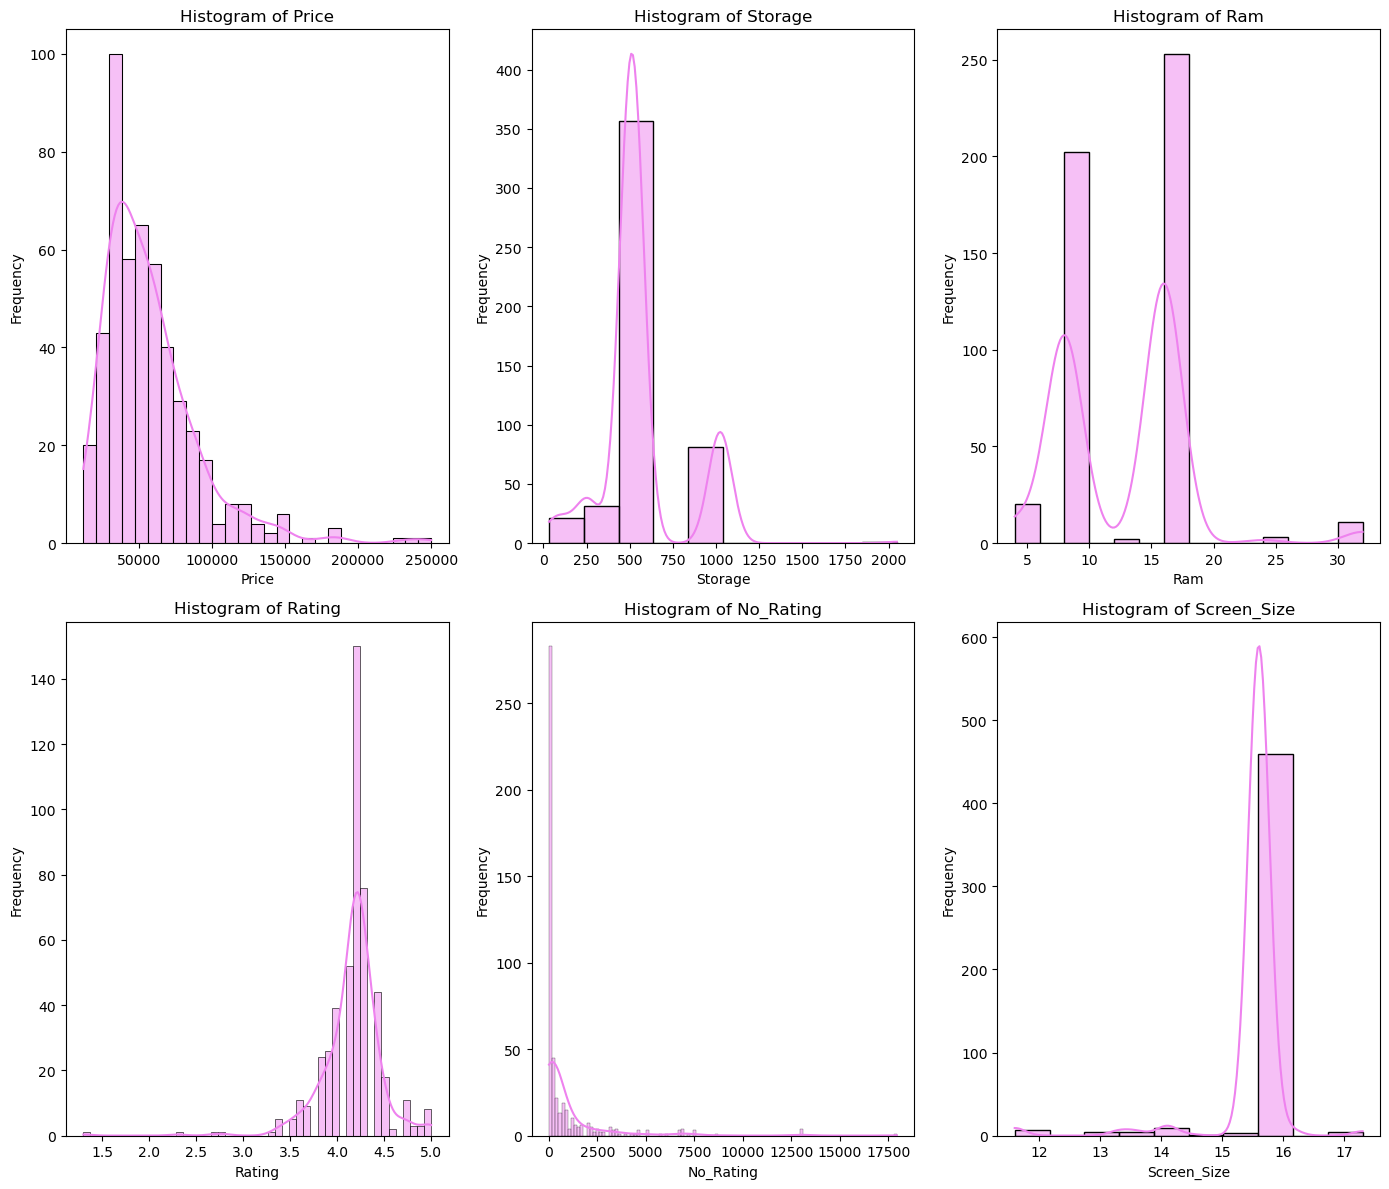

In [26]:

# List of numerical columns
numerical_cols = ['Price', 'Storage', 'Ram', 'Rating', 'No_Rating', 'Screen_Size']

# Set the figure size
plt.figure(figsize=(14, 12))

# Create histogram plots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots (2 rows, 3 columns)
    sns.histplot(data=df, x=col, kde=True, color='violet')  # KDE is added to visualize the distribution
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


### The histogram plots provide a clear view of the distribution of numerical features in the laptop dataset.
### Most laptops are priced between ₹40,000 and ₹70,000, suggesting affordability and mid-range market targeting. 
### Storage is largely concentrated at 512GB, with a smaller segment offering 1TB, indicating common usage preferences. 
### RAM is predominantly either 8GB or 16GB, catering to average and power users. ### Ratings show a concentration around 4.2–4.5, reflecting generally positive customer feedback. ### The number of ratings varies widely, but most laptops have moderate engagement. Screen sizes are mostly between 15.6 and 16 inches, aligning with standard consumer expectations.
###  Overall, the data leans towards mid-range, well-rated laptops with practical specifications.

## 🔷 2. Violin Plot

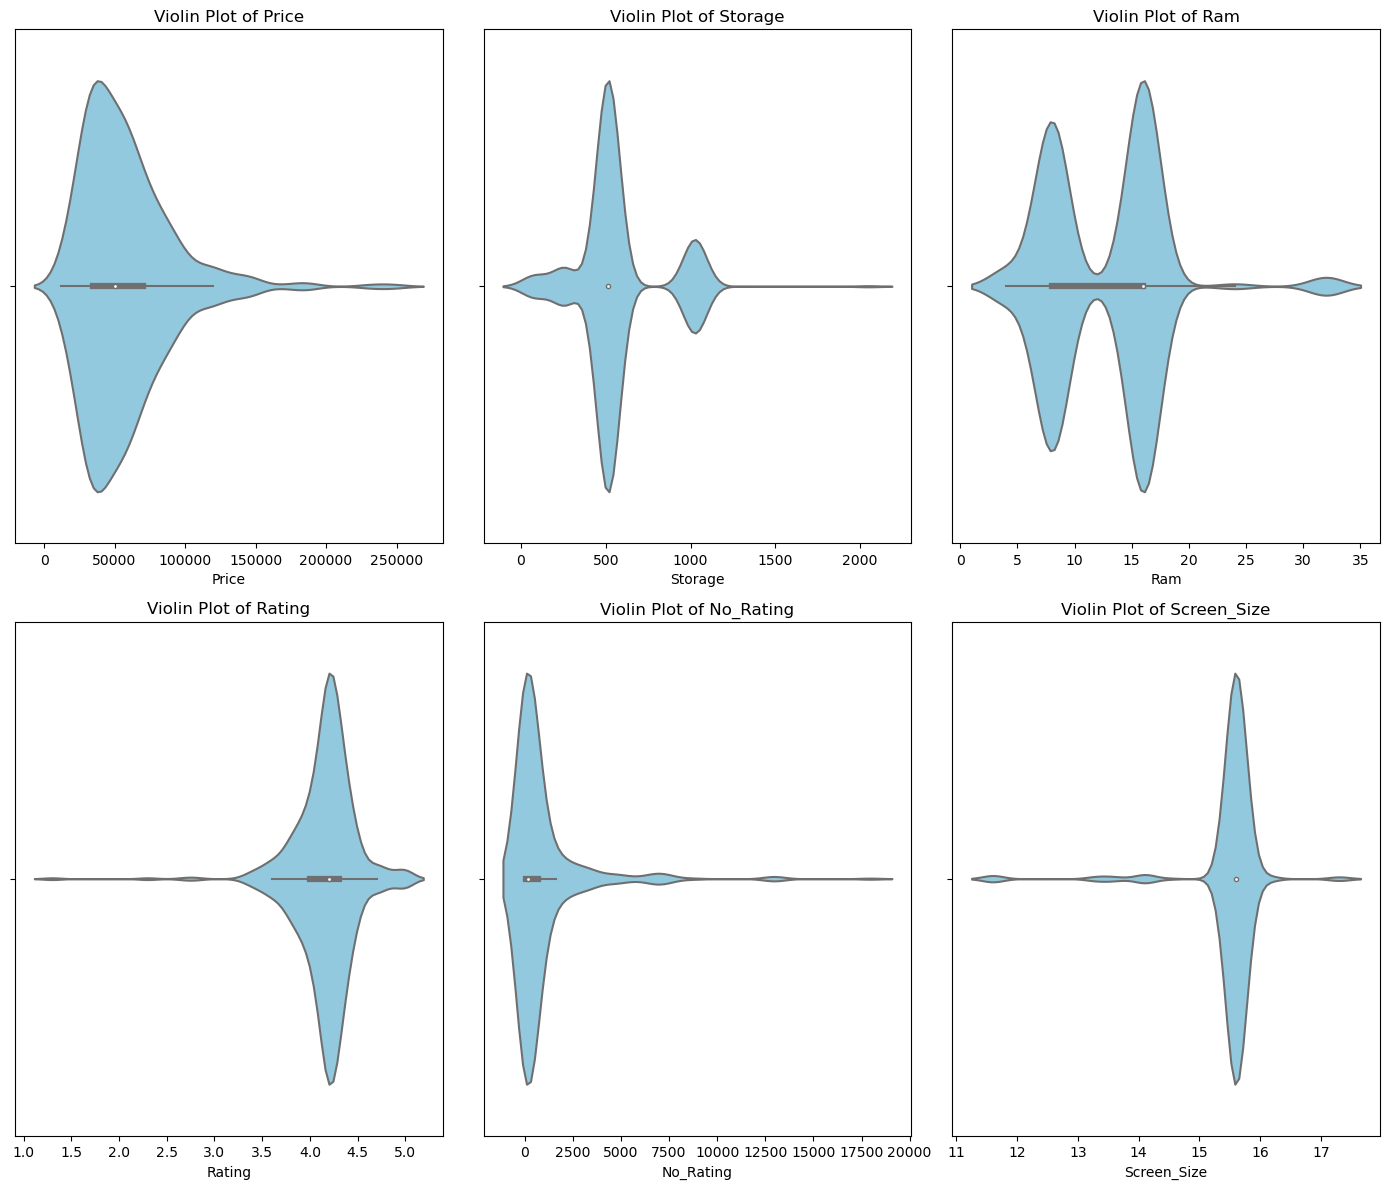

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['Price', 'Storage', 'Ram', 'Rating', 'No_Rating', 'Screen_Size']

# Set the figure size
plt.figure(figsize=(14, 12))

# Create violin plots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots (2 rows, 3 columns)
    sns.violinplot(data=df, x=col, color='skyblue')  # Set the color of the violin plot to blue
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()


### The violin plots provide a detailed view of the distribution of numerical features. Most laptop prices are concentrated between ₹30,000 and ₹70,000, with a few high-end outliers. Storage is dominated by 512GB and 1TB variants, while RAM shows peaks around 8GB and 16GB.

### Overall, the plots show where most data is concentrated and reveal multimodal distributions in RAM and storage.

## 🔵3. KDE plot 

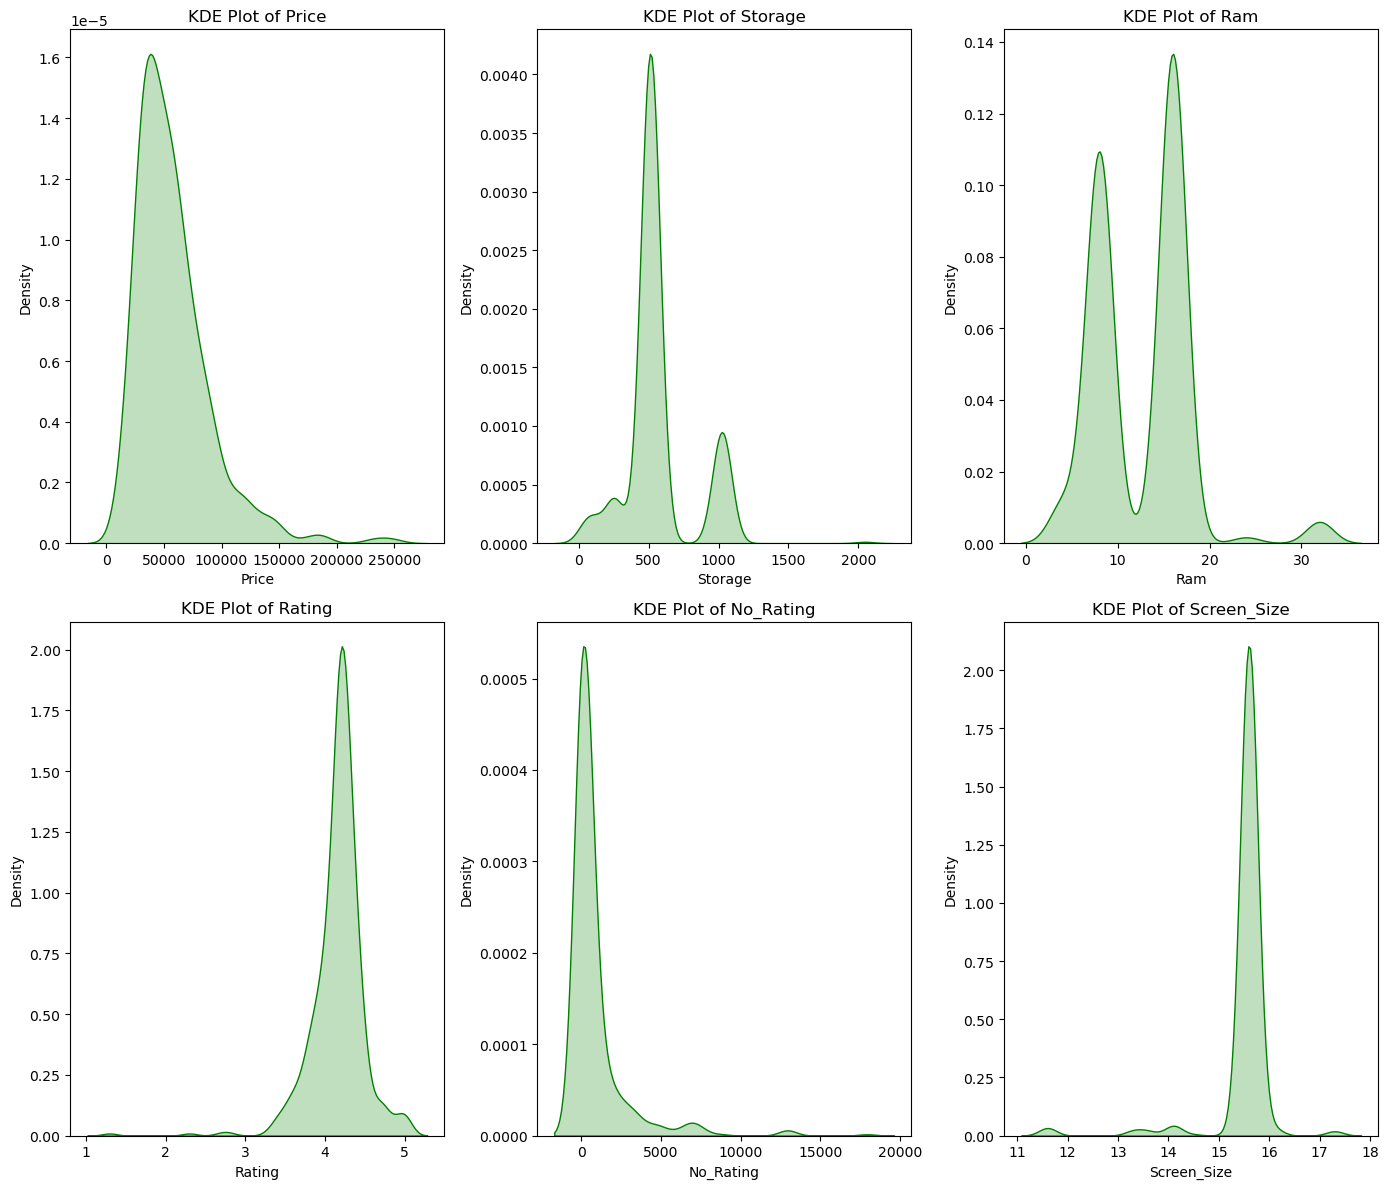

In [98]:


# List of numerical columns
numerical_cols = ['Price', 'Storage', 'Ram', 'Rating', 'No_Rating', 'Screen_Size']
# Set the figure size
plt.figure(figsize=(14, 12))

# Create KDE plots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots (2 rows, 3 columns)
    sns.kdeplot(data=df, x=col, fill=True, color='green')  # Set the color of the KDE plot to blue
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()


### The KDE (Kernel Density Estimation) plots show the smoothed distribution of numerical laptop features:

### Price: Highly right-skewed, most laptops are priced between ₹30,000–₹70,000.

### Storage: Peaks around 512GB and 1TB, with a few products having very large capacities.

### Rating: Most ratings are concentrated near 4.0, suggesting generally well-reviewed products.

## 🔷4. Strip Plot

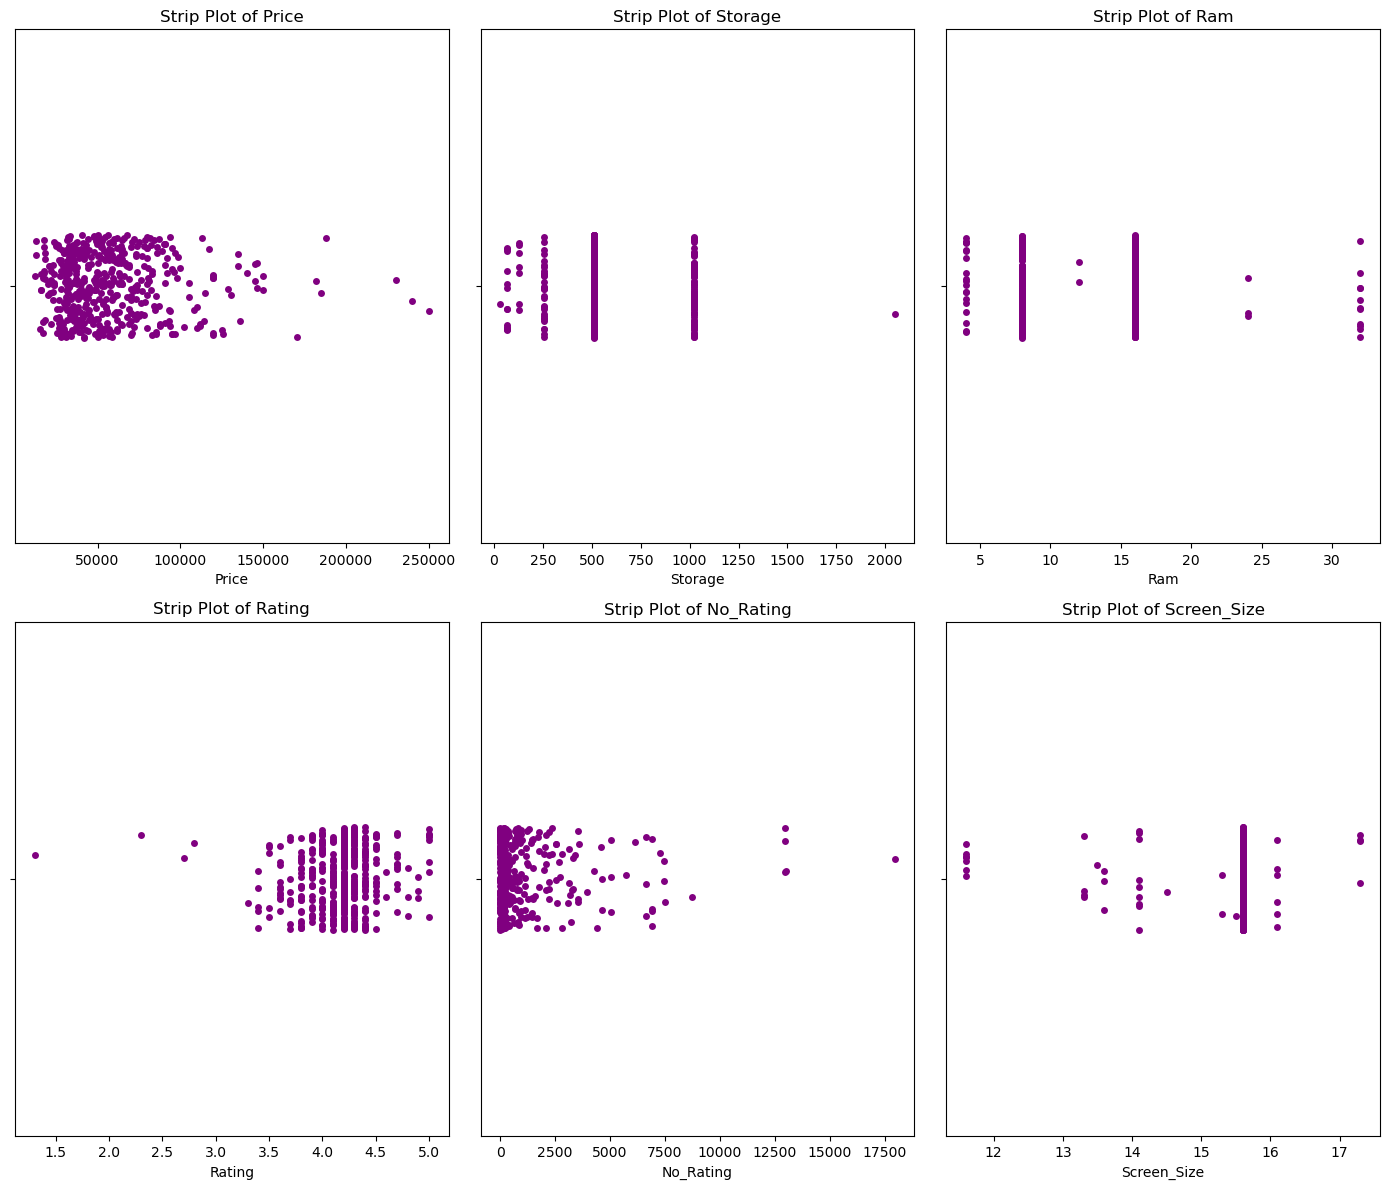

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['Price', 'Storage', 'Ram', 'Rating', 'No_Rating', 'Screen_Size']

# Set the figure size
plt.figure(figsize=(14, 12))

# Create strip plots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots (2 rows, 3 columns)
    sns.stripplot(data=df, x=col, color='purple', jitter=True)  # Set color of strip plot to blue and add jitter for better visibility
    plt.title(f'Strip Plot of {col}')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()


### This plot shows the 
### Price: Most data points are clustered below ₹100,000, with a few laptops priced much higher.
### Storage: Clearly discrete values (e.g., 256GB, 512GB, 1TB), indicating standard configurations.

### These strip plots emphasize data distribution and clustering, especially useful for spotting discrete values and outliers.

## 🟠5. Swarm Plot

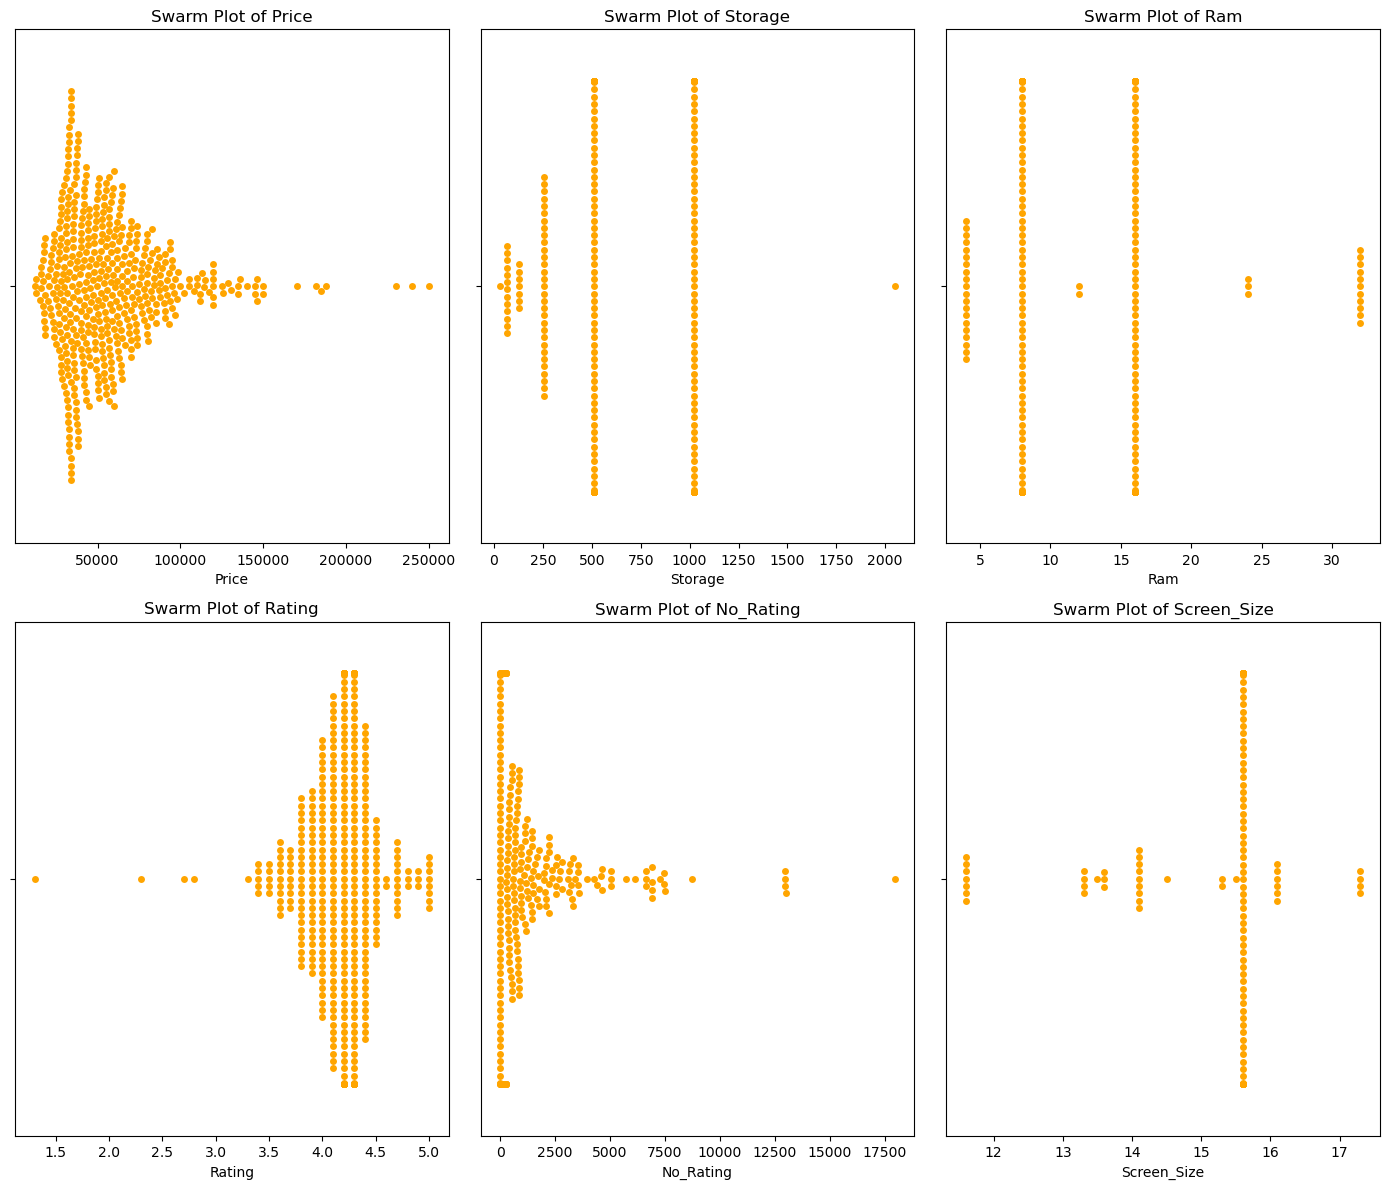

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['Price', 'Storage', 'Ram', 'Rating', 'No_Rating', 'Screen_Size']

# Set the figure size
plt.figure(figsize=(14, 12))

# Create swarm plots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots (2 rows, 3 columns)
    sns.swarmplot(data=df, x=col, color='orange')  # Set color of swarm plot to blue
    plt.title(f'Swarm Plot of {col}')
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

### Swarm plots give a clear visualization of how individual data points cluster around specific values, especially useful for identifying patterns and frequency of common configurations.

## Bivariate Analysis

## Categorical vs Categorical

### 1. Grouped bar plot 

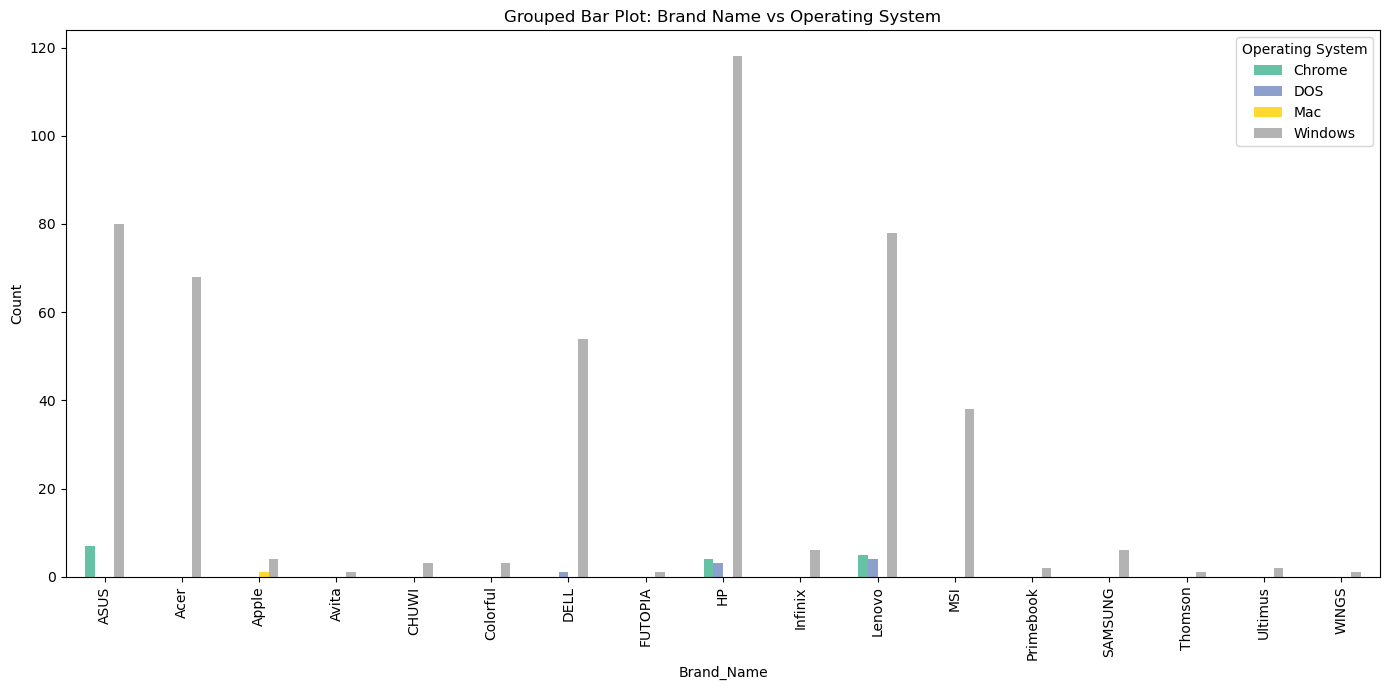

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouped Bar Plot
grouped_data = df.groupby(['Brand_Name', 'Operating_System']).size().unstack().fillna(0)

# Plot
grouped_data.plot(kind='bar', figsize=(14, 7), colormap='Set2')
plt.title('Grouped Bar Plot: Brand Name vs Operating System')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Operating System')
plt.tight_layout()
plt.show()


### By this plot 
###  Windows is the most widely used OS across brands, while other operating systems are brand-specific or less frequent.

## 2. Cross tab  Heat map

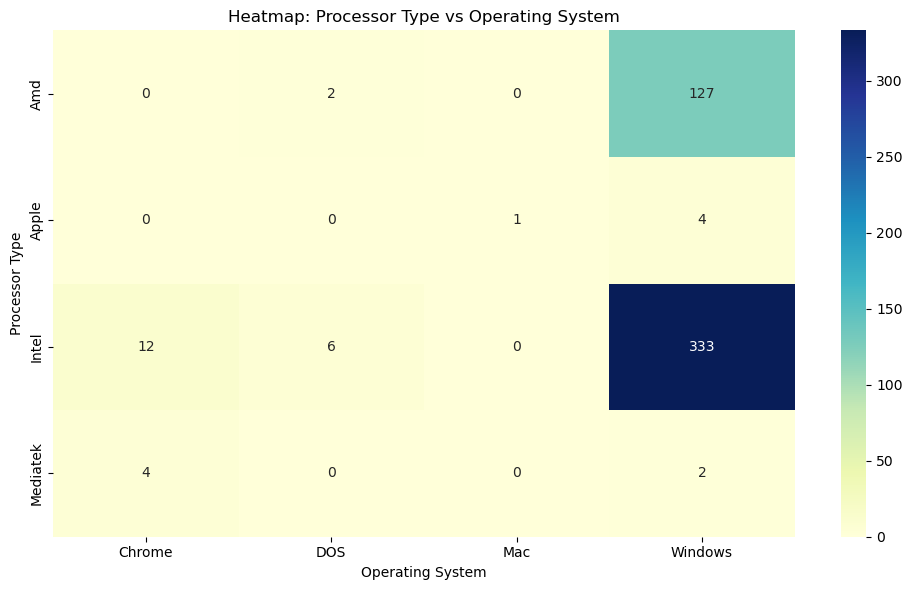

In [52]:
# Create a crosstab
crosstab_data = pd.crosstab(df['Processor_Type'], df['Operating_System'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap: Processor Type vs Operating System')
plt.ylabel('Processor Type')
plt.xlabel('Operating System')
plt.tight_layout()
plt.show()


### Windows OS supports the widest variety of processors, with Intel being the most common. Chrome OS and DOS are mostly paired with Intel or Mediatek, while Mac OS is exclusive to Apple processors.

## Numerical vs Numerical

## 1. Scatter plot

In [55]:
numerical_cols = ['Price', 'Storage', 'Ram', 'Rating', 'No_Rating', 'Screen_Size']


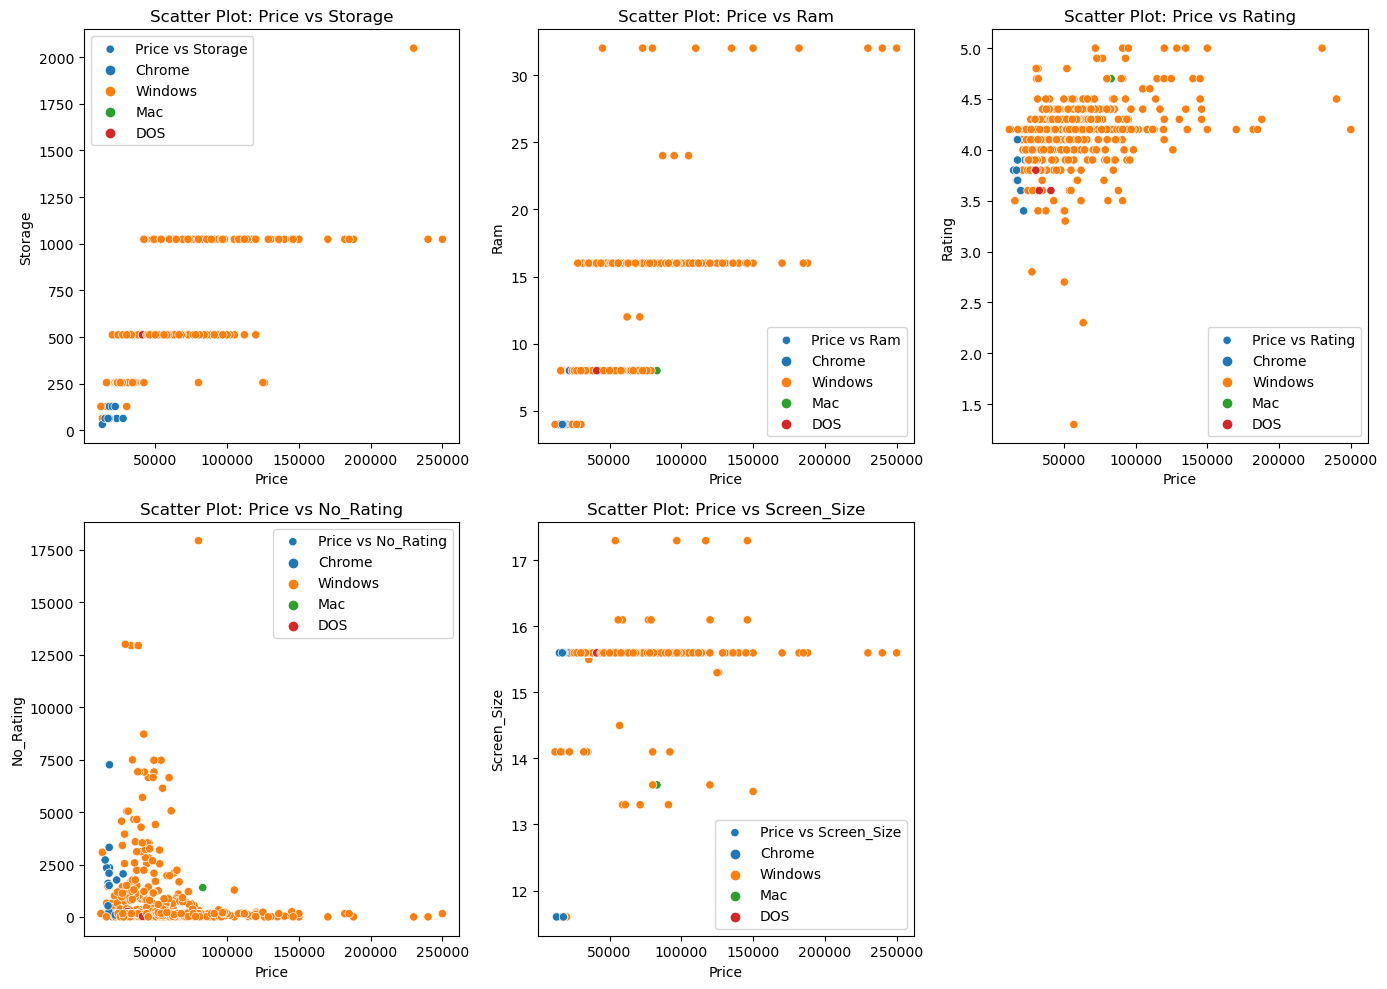

In [88]:
plt.figure(figsize=(14, 10))
colors = ['red', 'green', 'blue', 'orange', 'purple']
for i, col in enumerate(numerical_cols[1:], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x='Price', y=col, hue='Operating_System', color=colors[i-1], label=f'Price vs {col}')
    plt.title(f'Scatter Plot: Price vs {col}')
    plt.xlabel('Price')
    plt.ylabel(col)
    plt.legend()

plt.tight_layout()
plt.show()


## 2.Correlation Heatmap

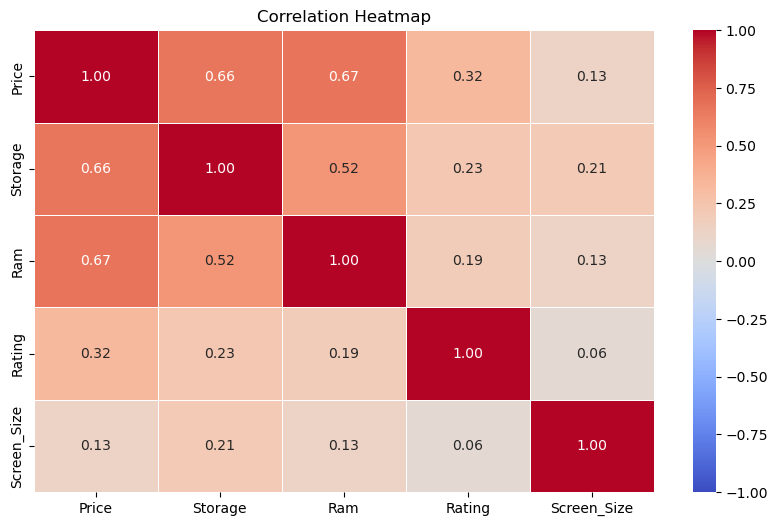

In [13]:
correlation_matrix = df[['Price', 'Storage', 'Ram', 'Rating', 'Screen_Size']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### The heatmap shows that Price has a strong positive correlation with both Storage (0.66) and RAM (0.67), indicating that laptops with higher specifications tend to be more expensive. 


In [10]:
import warnings
warnings.filterwarnings('ignore')

## Categorical vs Numerical

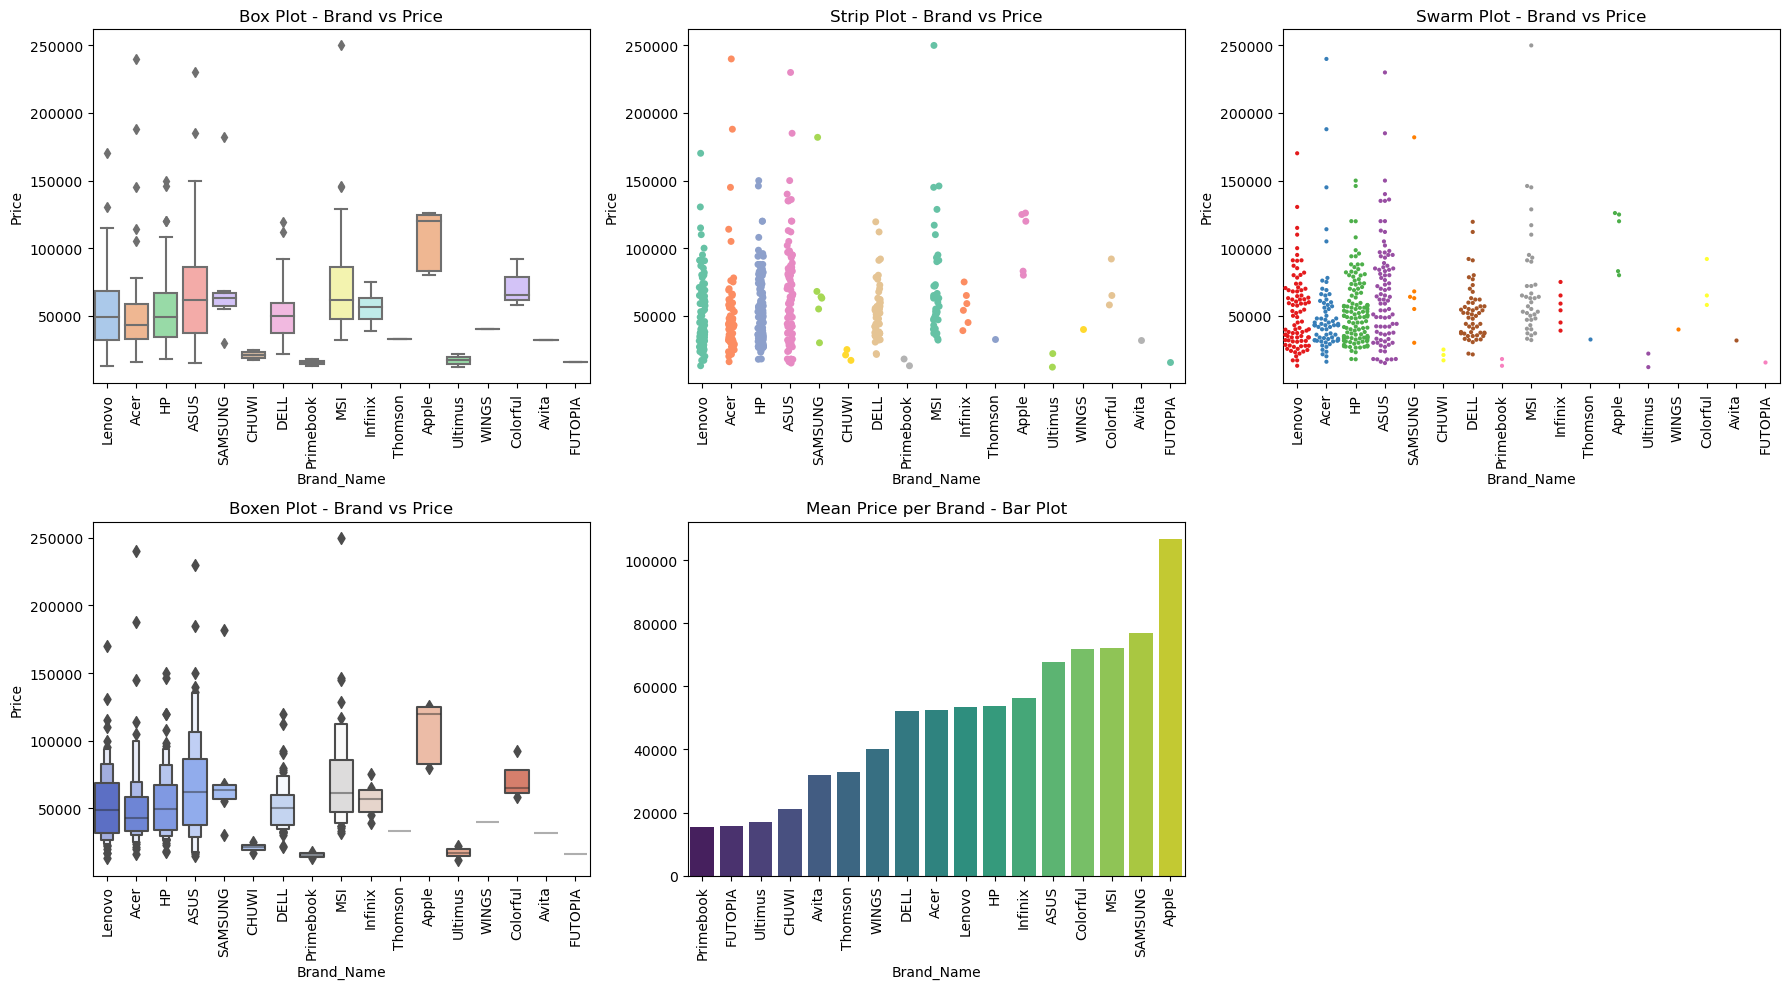

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and layout
plt.figure(figsize=(18, 10))

# Box Plot
plt.subplot(2, 3, 1)
sns.boxplot(x='Brand_Name', y='Price', data=df, palette='pastel')
plt.title('Box Plot - Brand vs Price')
plt.xticks(rotation=90)


# Strip Plot
plt.subplot(2, 3, 2)
sns.stripplot(x='Brand_Name', y='Price', data=df, palette='Set2', jitter=True)
plt.title('Strip Plot - Brand vs Price')
plt.xticks(rotation=90)

# Swarm Plot
plt.subplot(2, 3, 3)
sns.swarmplot(x='Brand_Name', y='Price',data=df, palette='Set1', size=3)
plt.title('Swarm Plot - Brand vs Price')
plt.xticks(rotation=90)

# Boxen Plot (Optional Extra Visualization)
plt.subplot(2, 3, 4)
sns.boxenplot(x='Brand_Name', y='Price', data=df, palette='coolwarm')
plt.title('Boxen Plot - Brand vs Price')
plt.xticks(rotation=90)

# Bar Plot (Mean Price per Brand)
plt.subplot(2, 3, 5)
brand_price = df.groupby('Brand_Name')['Price'].mean().sort_values()
sns.barplot(x=brand_price.index, y=brand_price.values, palette='viridis')
plt.title('Mean Price per Brand - Bar Plot')
plt.xticks(rotation=90)

# Adjust layout and show
plt.tight_layout()
plt.show()


### The analysis explores laptop pricing across different brands using box plots, strip plots, and swarm plots.
### It is observed that Apple consistently has the highest price range, with a few outliers at even higher values. ### Brands like Asus, HP, and Dell show a wide distribution of prices, indicating a variety of models across budgets. 
### Meanwhile, brands like Primebook and Fujitsu cluster at the lower end of the price spectrum. 
### Overall, the visualizations reveal significant price variations both within and across brands.

# Conclusion 💭

### 🔹 In this project, I finally conclude that I successfully scraped detailed laptop data from Flipkart using Python libraries like requests and BeautifulSoup using  Jupyter Notebook and  extracted key specifications such as brand, model, processor, RAM, storage, operating system, and price. 

### 🔹 I observed that brands like Lenovo, HP, and ASUS dominate the online market, and specifications such as higher RAM, SSD storage and most laptops priced under  ₹60,000, though premium models push the price range higher.

### 🔹Overall, this project demonstrated a complete data analysis lifecycle—from web data extraction to business insight generation—highlighting the power of data-driven decision-making in the e-commerce domain.



#  Thank you 🤝